#### 作業目標: 
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

#### 作業重點:
請新增兩層MLP與三層MLP看看最後預測結果與一層的MLP是否有差異
請詳細說明修改的程式碼位置與你覺得為什麼會有差異?
請注意!!! 每一個block code都一定要在自己本機執行過後再上傳到雲端學院與github
請注意!!! ipynb檔名:Pytorch_Mnist_MLP_HW_學號.ipynb

參考程式: https://github.com/iam-mhaseeb/Multi-Layer-Perceptron-MNIST-with-PyTorch/blob/master/mnist_mlp_exercise.ipynb

班級:數四甲

姓名:詹士賢

學號:S0822031

In [1]:
# import libraries
import torch
import numpy as np

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

0.3%

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



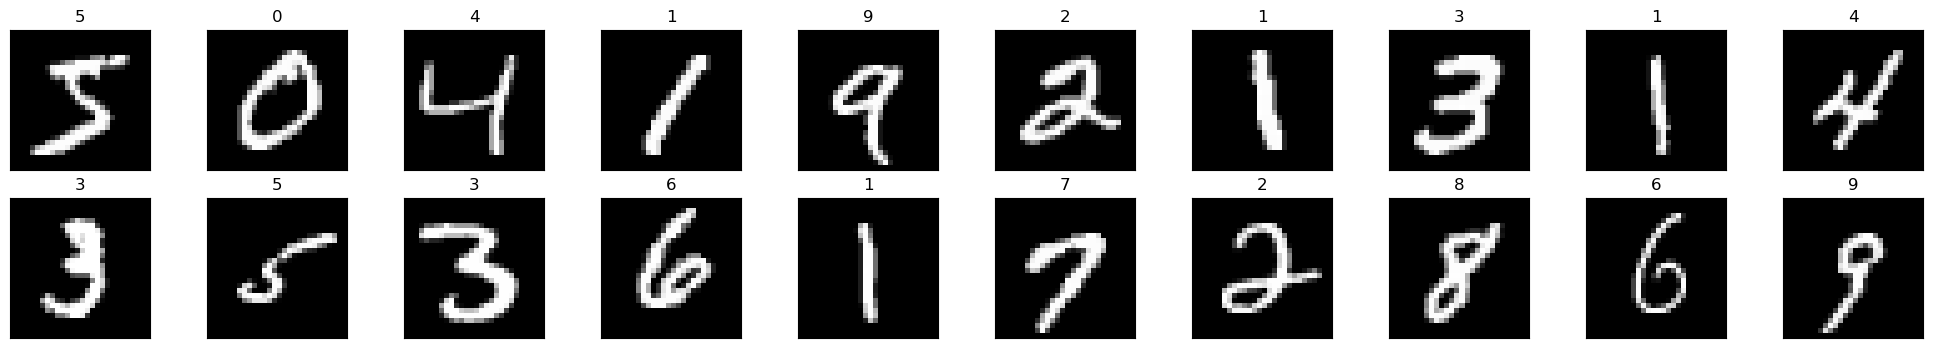

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

## Define the Network Architecture
    這個MLP架構將每個影像的784張量(pixel)視為輸入，並生成一個長度為10（class number）的張量。這個例子使用了兩個hidden layer和dropout 來避免overfitting

In [10]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        #新增一層隱藏層
        # linear layer (n_hidden_2 -> hidden_3)
        self.fc3 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc4 = nn.Linear(512, 10)  
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        #新增第一層隱藏層
        # linear layer (n_hidden_2 -> hidden_3)
        self.fc3 = nn.Linear(512, 512)
        #新增第二層隱藏層
        # linear layer (n_hidden_3 -> hidden_4)
        self.fc4 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc5 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x
# initialize the NN
model1 = Net1()
model2 = Net2()
model3 = Net3()
print(model1)
print("-----------")
print(model2)
print("-----------")
print(model3)

Net1(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
-----------
Net2(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
-----------
Net3(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## 定義loss function and optimizer (這裡選擇SGD)

In [11]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.01)

## Training Model

In [13]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model1.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer1.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model1(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer1.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.435030
Epoch: 2 	Training Loss: 0.379162
Epoch: 3 	Training Loss: 0.354246
Epoch: 4 	Training Loss: 0.339092
Epoch: 5 	Training Loss: 0.328574
Epoch: 6 	Training Loss: 0.320700
Epoch: 7 	Training Loss: 0.314508
Epoch: 8 	Training Loss: 0.309466
Epoch: 9 	Training Loss: 0.305253
Epoch: 10 	Training Loss: 0.301659


## Testing Model

In [15]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model1.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model1(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.291525

Test Accuracy of     0: 98% (961/980)
Test Accuracy of     1: 97% (1106/1135)
Test Accuracy of     2: 87% (907/1032)
Test Accuracy of     3: 90% (912/1010)
Test Accuracy of     4: 92% (911/982)
Test Accuracy of     5: 87% (780/892)
Test Accuracy of     6: 94% (906/958)
Test Accuracy of     7: 91% (938/1028)
Test Accuracy of     8: 88% (862/974)
Test Accuracy of     9: 90% (914/1009)

Test Accuracy (Overall): 91% (9197/10000)


以下是二層MLP

In [19]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model2.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.300602
Epoch: 2 	Training Loss: 0.297613
Epoch: 3 	Training Loss: 0.294979
Epoch: 4 	Training Loss: 0.292631
Epoch: 5 	Training Loss: 0.290521
Epoch: 6 	Training Loss: 0.288609
Epoch: 7 	Training Loss: 0.286864
Epoch: 8 	Training Loss: 0.285264
Epoch: 9 	Training Loss: 0.283788
Epoch: 10 	Training Loss: 0.282420


In [24]:
#initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model2.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model2(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.279364

Test Accuracy of     0: 98% (964/980)
Test Accuracy of     1: 97% (1108/1135)
Test Accuracy of     2: 88% (916/1032)
Test Accuracy of     3: 90% (915/1010)
Test Accuracy of     4: 92% (912/982)
Test Accuracy of     5: 87% (782/892)
Test Accuracy of     6: 94% (910/958)
Test Accuracy of     7: 91% (943/1028)
Test Accuracy of     8: 88% (865/974)
Test Accuracy of     9: 90% (912/1009)

Test Accuracy (Overall): 92% (9227/10000)


以下是三層MLP

In [20]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model3.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model3(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.798659
Epoch: 2 	Training Loss: 0.413061
Epoch: 3 	Training Loss: 0.370976
Epoch: 4 	Training Loss: 0.349651
Epoch: 5 	Training Loss: 0.336062
Epoch: 6 	Training Loss: 0.326388
Epoch: 7 	Training Loss: 0.319030
Epoch: 8 	Training Loss: 0.313180
Epoch: 9 	Training Loss: 0.308377
Epoch: 10 	Training Loss: 0.304339


In [25]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model3.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model3(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.293144

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1105/1135)
Test Accuracy of     2: 87% (902/1032)
Test Accuracy of     3: 90% (911/1010)
Test Accuracy of     4: 92% (908/982)
Test Accuracy of     5: 87% (780/892)
Test Accuracy of     6: 94% (903/958)
Test Accuracy of     7: 91% (939/1028)
Test Accuracy of     8: 88% (861/974)
Test Accuracy of     9: 90% (913/1009)

Test Accuracy (Overall): 91% (9184/10000)


出來的結果一層與二層與三層差異並不顯著，我推測或許是因為辨識手寫數字這個問題相對其他複雜的問題(例如辨識動物)來說，特徵相對簡單，所以三者的準確度並沒有顯著差異。